# Monte Carlo inference

## Exercise 23.1 - Sampling from a Cauchy

Show how to use inverse probability transform to sample from a standard Cauchy,
$T(x | 0, 1, 1)$.

From equation (2.51) we see that a standard Cauchy distribution has a density
proportional to $(1 + x^2)^{-1}$. Computing the unnormalized CDF over this
expression will give us the normalization constant as well as a hopefully
invertible expression for the inverse probability transform.

$$\mathrm{CDF}(x) \propto \int_{-\infty}^x \frac{1}{1 + x^2}\,\mathrm{d}x = \arctan(x) + \frac{\pi}{2}$$

If you did not remember the antiderivative of $(1 + x^2)^{-1}$ from your
calculus class (like me), you can find a derivation in these [class
notes](https://ocw.mit.edu/courses/mathematics/18-01sc-single-variable-calculus-fall-2010/1.-differentiation/part-b-implicit-differentiation-and-inverse-functions/session-15-implicit-differentiation-and-inverse-functions/MIT18_01SCF10_Ses15b.pdf).
From here we see that the normalization constant is $\pi$ and the exact formula
of the CDF is $\mathrm{CDF}(x) = \pi^{-1} \left( \arctan(x) + \frac{\pi}{2}
\right)$. This is easy enough to invert as

$$\mathrm{CDF}^{-1}(x) = \tan\left( \pi x - \frac{\pi}{2} \right)$$

and we can sample from a standard Cauchy by sampling $x$ in the above formula
from a $U(0, 1)$ distribution.

## Exercise 23.2 - Rejection sampling from a Gamma using a Cauchy proposal

Show how to use a Cauchy proposal to perform rejection sampling from a Gamma
distribution. Derive the optimal constant $M$, and plot the density and its
upper envelope.

We begin by reminding ourselves of the densities of the Cauchy and Gamma
distributions from equations (2.51) and (2.55) and what we learnt in the first
exercise. Reintroducing the parameters $\mu$ and $\sigma$ does not change the
normalization constant.

$$\mathrm{Cauchy}(x | \mu, \sigma) = \pi^{-1} \left[1 + \left( \frac{x - \mu}{\sigma} \right)^2\right]^{-1} \qquad \mathrm{Gamma}(x | a, b) = \frac{b^a}{\Gamma(a)} x^{a - 1} e^{-xb}$$

A permissible $M$ for rejection sampling is a number such that $M \cdot
\mathrm{Cauchy} \ge \mathrm{Gamma}$. The optimal $M$ is the smallest such
number, i.e.

$$M = \sup_{x > 0} \frac{\mathrm{Gamma}(x | a, b)}{\mathrm{Cauchy}(x | \mu, \sigma)} = \frac{\pi b^a}{\Gamma(a)} \sup_{x > 0} x^{a - 1} e^{-xb} \left( 1 + \frac{(x - \mu)^2}{\sigma^2} \right)$$

To find it, we need to analyse the expression inside the supremum. The first
thing to note is that the supremum does not exist for $a < 1$ because $x^{a -
1}$ diverges while the other two factors converge to positive finite numbers as
$x \rightarrow 0$. Therefore rejection sampling is only possible for $a \ge 1$.
The term converges to $0$ as $x$ approaches $\infty$. The limit at $0$ depends
on the value $a$. For $a > 1$, the term converges to $0$, but for $a = 1$, it
converges to $1 + \mu^2/\sigma^2$ instead.

Now we find the supremum by computing the roots of the derivative as usual.
However, for the fully general formula, the root expressions become several
lines long according to wolfram alpha. I suspect that I am either missing
something or Murphy meant to use a simpler special case as in the previous
exercise. The most general form, I could solve by hand was with $a$ fixed to
$1$. In that case the derivative is

$$-b \sigma^{-2} e^{-bx} \left[ \left( x - \mu - \frac{1}{b} \right)^2 - \frac{1}{b^2} + \sigma^2 \right]$$

which has a single root at $x = \sqrt{b^{-2} - \sigma^2} + \mu + b^{-1}$ as long
as $b^{-1} \ge \sigma$. At the root $M$ takes the value

$$M' = \pi b \cdot \exp(-\sqrt{1 - b^2\sigma^2} - b\mu - 1) \left( 1 + \frac{\left( \sqrt{b^{-2} - \sigma^2} + b^{-1} \right)^2}{\sigma^2} \right).$$

From this we can derive the optimal $M^{*}$. Remembering that we are in the
special case of $a = 1$, we need to compare the value at the critical point to
the value at the left limit and arrive at

$$M^{*} = \begin{cases}\pi b \left( 1 + \mu^2/\sigma^2 \right) & \text{if $b^{-1} < \sigma$,}\\ M' & \text{if $M' > \pi b \left( 1 + \mu^2/\sigma^2 \right)$,}\\ \pi b \left( 1 + \mu^2/\sigma^2 \right) & \text{otherwise.}\end{cases}$$

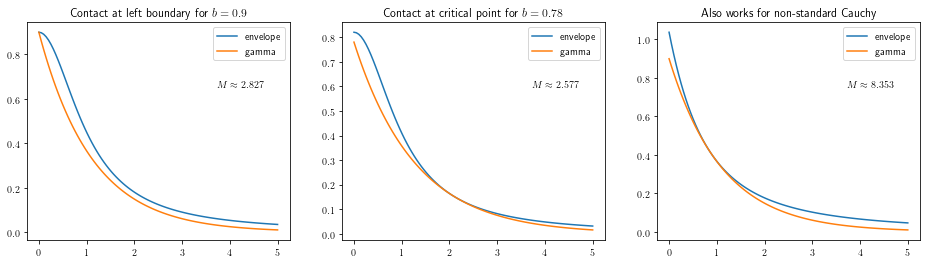

In [52]:
import matplotlib.pyplot as pp
import numpy as np
%matplotlib inline

def cauchy(x, mu, sigma):
    return np.reciprocal(np.pi * (1 + np.square((x - mu) / sigma)))

def gamma(x, b):
    return b * np.exp(-b * x)

def plot_envelope(ax, x, mu, sigma, b):
    if b * sigma > 1:
        M = np.pi * b * (1 + mu**2 / sigma**2)
    else:
        cauchy_term = 1 + (1/b + np.sqrt(1/b**2 - sigma**2))**2 / sigma**2
        gamma_term = np.exp(-1 - b * mu - np.sqrt(1 - np.square(b * sigma)))
        M = np.pi * b * max(gamma_term * cauchy_term, 1.0 + mu**2 / sigma**2)

    ax.plot(x, M * cauchy(x, mu, sigma), label="envelope")
    ax.plot(x, gamma(x, b), label="gamma")
    ax.text(0.9, 0.7, "$M \\approx {:.3f}$".format(M),
            transform=ax.transAxes, horizontalalignment="right")

x = np.linspace(0, 5, 100)

fig, ax = pp.subplots(1, 3, figsize=(16, 4))
ax[0].set(title="Contact at left boundary for $b = 0.9$")
plot_envelope(ax[0], x, 0.0, 1.0, b=0.9)
ax[1].set(title="Contact at critical point for $b = 0.78$")
plot_envelope(ax[1], x, 0.0, 1.0, b=0.78)
ax[2].set(title="Also works for non-standard Cauchy")
plot_envelope(ax[2], x, -1.0, 0.8, b=0.9)

ax[0].legend()
ax[1].legend()
ax[2].legend();